#### Data Augmentation on Single Image

In [ ]:
from keras.preprocessing.image import ImageDataGenerator

In [ ]:
img = cv2.imread("/content/img/cat.jpg")
img = cv2.resize(img,(200,200))

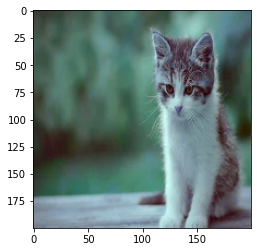

In [ ]:
plt.imshow(img)

In [ ]:
datagen = ImageDataGenerator(
        rotation_range=30,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,)

In [ ]:
img.shape

(200, 200, 3)

In [ ]:
input_batch = img.reshape(1,200,200,3)

In [ ]:
i = 0

for output in datagen.flow(input_batch,batch_size=1,save_to_dir="aug"):
  i = i + 1
  if i == 10:
    break

#### Data Augmentation on Cat Dog Classifier

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [ ]:
!kaggle datasets download -d arpitjain007/dog-vs-cat-fastai

 99% 1.59G/1.60G [00:35<00:00, 49.6MB/s]
100% 1.60G/1.60G [00:35<00:00, 48.4MB/s]


In [ ]:
import zipfile
zip_ref = zipfile.ZipFile('/content/dog-vs-cat-fastai.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [ ]:
import cv2
import os
import random
import numpy as np
import matplotlib.pyplot as plt

from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten

In [ ]:
dir = "/content/dogscats/train"
categories = ['cats',"dogs"]

In [ ]:
data = []
for i in categories:
  folder = os.path.join(dir,i)
  label = categories.index(i)
  for img in os.listdir(folder):
    img_path = os.path.join(folder,img)
    img_arr = cv2.imread(img_path)
    img_arr =cv2.resize(img_arr,(100,100))
    data.append([img_arr,label])

In [ ]:
len(data)

23000

In [ ]:
random.shuffle(data)

In [ ]:
X = []
y = []

In [ ]:
for features,label in data:
  X.append(features)
  y.append(label)

In [ ]:
X = np.array(X)
y = np.array(y)

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [ ]:
X_train = X_train/255
X_test = X_test/255

In [ ]:
model = Sequential()

model.add(Conv2D(8,kernel_size=(3,3),activation="relu",input_shape=(100,100,3)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(32,activation="relu"))
model.add(Dense(1,activation="sigmoid"))

In [ ]:
model.compile(loss="binary_crossentropy",optimizer="adam",metrics=["accuracy"])

In [ ]:
model.fit(X_train,y_train,epochs=5,validation_split=0.2)

Epoch 1/5
460/460 [==============================] - 14s 10ms/step - loss: 0.6989 - accuracy: 0.4984 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 2/5
460/460 [==============================] - 3s 7ms/step - loss: 0.6932 - accuracy: 0.4995 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 3/5
460/460 [==============================] - 3s 7ms/step - loss: 0.6932 - accuracy: 0.5007 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 4/5
460/460 [==============================] - 3s 6ms/step - loss: 0.6932 - accuracy: 0.4982 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 5/5
460/460 [==============================] - 3s 7ms/step - loss: 0.6932 - accuracy: 0.4974 - val_loss: 0.6932 - val_accuracy: 0.5000


In [ ]:
batch_size = 16

# this is the augmentation configuration we will use for training
train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)

# this is the augmentation configuration we will use for testing:
# only rescaling
test_datagen = ImageDataGenerator(rescale=1./255)

# this is a generator that will read pictures found in
# subfolers of 'data/train', and indefinitely generate
# batches of augmented image data
train_generator = train_datagen.flow_from_directory(
        '/content/dogscats/dogscats/train',  # this is the target directory
        target_size=(150, 150),  # all images will be resized to 150x150
        batch_size=batch_size,
        class_mode='binary')  # since we use binary_crossentropy loss, we need binary labels

# this is a similar generator, for validation data
validation_generator = test_datagen.flow_from_directory(
        '/content/dogscats/dogscats/valid',
        target_size=(150, 150),
        batch_size=batch_size,
        class_mode='binary')

Found 23000 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.


In [ ]:
model = Sequential()

model.add(Conv2D(8,kernel_size=(3,3),activation="relu",input_shape=(150,150,3)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(32,activation="relu"))
model.add(Dense(1,activation="sigmoid"))

In [ ]:
model.compile(loss="binary_crossentropy",optimizer="adam",metrics=["accuracy"])

In [ ]:
model.fit_generator(train_generator,steps_per_epoch=100,epochs=2,validation_data=validation_generator,validation_steps=800)

Epoch 1/2


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  """Entry point for launching an IPython kernel.


100/100 [==============================] - ETA: 0s - loss: 0.6932 - accuracy: 0.5063

100/100 [==============================] - 17s 166ms/step - loss: 0.6932 - accuracy: 0.5063 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 2/2
100/100 [==============================] - 11s 113ms/step - loss: 0.6932 - accuracy: 0.4975
